In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [370]:
a, b, c, x = symbols("a b c x")
deltax = symbols("\Delta{}x")
f0, f1, f2 = symbols("f_0 f_1 f_2")

coefficients = solve([Eq(f0, c),
                     Eq(f1, a * deltax**2 + b * deltax + c),
                     Eq(f2, 4 * a * deltax**2 + 2 * b * deltax + c)],
                     [a, b, c])
coefficients

{a: (f_0 - 2*f_1 + f_2)/(2*\Delta{}x**2),
 b: (-3*f_0 + 4*f_1 - f_2)/(2*\Delta{}x),
 c: f_0}

In [371]:
x0 = symbols("x_0")
I = integrate(coefficients[a] * (x - x0)**2 + coefficients[b] * (x - x0) + coefficients[c],
              [x, x0 + deltax, x0+2*deltax])
simplify(I)

\Delta{}x*(-f_0 + 8*f_1 + 5*f_2)/12

Thus the last odd interval,
$$\int_{x_{0} + \Delta x}^{x_{0} + 2 \Delta x} P(x) dx = \frac{\Delta x}{12}(-f_{0} + 8f_{1} + 5f_{2})$$
The total even intervals can be approximated as:
$$\int_a^b f(x) dx \approx \frac{\Delta x}{3} \left[f(x_0)+4 \left(\sum_{i=1, i\  {\text{odd}}}^{n-1}f(x_i)\right)+2 \left(\sum_{i=2, i\  {\text{even}}}^{n-2}f(x_i)\right)+f(x_n)\right]$$

In [10]:
a = int(input("Enter a value (must be an integer value): "))
b = int(input("Enter b value (must be an integer value): "))
n = int(input("Enter N value (must be an integer value): "))
x = np.array([])
y =  np.array([])

''' Given N odd intervals'''
def f(x):
    return x * np.sin(2 * np.pi *x)

#The even interval section
def even_simpsons(a,b,n,x,y,f):
    even_bins = n - 1
    h = (b - a) / n
    b_new = b - h
    h = (b_new - a) / even_bins
    for i in range(1,even_bins):
        step = a + i*h
        x = np.append(x, step)
    for j in range(len(x)):
        temp = x[j]
        y = np.append(y, f(temp))
    s1 = sum(y[0::2])
    s2 = sum(y[1:even_bins:2]) 
    return h/3 * (f(0) + 4*s1 + 2*s2 + f((b_new)))

#the odd interval
def odd_simpsons(a,b,n,x,y,f):
    h = (b - a) / n
    for i in range(n-2, n+1):
        step = i*h
        x = np.append(x,step)
    for j in range(len(x)):
        temp = x[j]
        y = np.append(y, f(temp))
    return h/12 * (-y[0] + 8*y[1] + 5*y[-1])

I_even = even_simpsons(a,b,n,x,y,f)
I_odd = odd_simpsons(a,b,n,x,y,f)
I_total = I_even + I_odd

print(f"The entered a value: {a}; The entered b value: {b}; The entered n value: {n}")
print(f"even intervals' answer: {I_even}")
print(f"odd interval's answer: {I_odd}")
print(f"total integral value: {I_total}")

The entered a value: 0; The entered b value: 5; The entered n value: 99
even intervals' answer: -0.7563509893680431
odd interval's answer: -0.039775310408230645
total integral value: -0.7961262997762738


In [378]:
exact = (-1.0* 5.0) / (2.0 * np.pi)
print(f'The exact value is: {exact}')
N = np.array([3, 5, 9, 17, 33, 99, 1003 , 100005])
for i in range(len(N)):
    I_even = even_simpsons(a,b,N[i],x,y,f)
    I_odd = odd_simpsons(a,b,N[i],x,y,f)
    I_total = I_even + I_odd
    print(f"The total integral at n: {N[i]} is {I_total}")
    error = (abs(I_total - exact) / abs(exact)) * 100
    print(f"relative error at n: {N[i]} = {error}%")


The exact value is: -0.7957747154594768
The total integral at n: 3 is 1.8042195912175818
relative error at n: 3 = 326.72492052927737%
The total integral at n: 5 is -1.0205389992894608e-14
relative error at n: 5 = 99.9999999999987%
The total integral at n: 9 is -1.9834685684319586
relative error at n: 9 = 149.2500113284842%
The total integral at n: 17 is -0.7313788338083285
relative error at n: 17 = 8.09222514866741%
The total integral at n: 33 is -0.8130772681986935
relative error at n: 33 = 2.1743029029549343%
The total integral at n: 99 is -0.7961262997762738
relative error at n: 99 = 0.044181388270679814%
The total integral at n: 1003 is -0.7957747514857308
relative error at n: 1003 = 4.527192607551864e-06%
The total integral at n: 100005 is -0.7957747154594748
relative error at n: 100005 = 2.511265318566215e-13%


In [15]:
p, x, n, v, m, k, T = symbols('p x n v m k T', real='True', positive='True')

Average velocity of an ideal gas described by the Maxwell-Boltzmann distribution:
$$\langle v \rangle = \frac{1}{n_I} \int_{0}^{\infty} 4 \pi n(p) p^2 (\frac{p}{m_{I}}) \,dp$$
where,
$$4 \pi n(p) p^2 \,dp = \frac{4 \pi p^2 n_{I}}{(2 \pi m_{I} k_{B} T)^{3/2}} e^{-p^2 / (2 m_{I} k_{B} T)}\,dp$$
Thus,
$$\langle v \rangle = \frac{1}{n_I} \int_{0}^{\infty} \frac{4 \pi p^2 n_{I}}{(2 \pi m_{I} k_{B} T)^{3/2}} e^{-p^2 / (2 m_{I} k_{B} T)}(\frac{p}{m_{I}}) \,dp$$

In [8]:
average1 = ((4 * pi * p**2 * n)/((2 * pi * m * k * T)**Rational(3,2))) * exp((-p**2)/(2 * k * T * m)) * (p / m)
averagev = (average1/n)
simplify(integrate(averagev,(p,0, oo)))

2*sqrt(2)*sqrt(T)*sqrt(k)/(sqrt(pi)*sqrt(m))

In [14]:
x = p / sqrt((2 * m * k * T))
simplify(diff(x,p))

sqrt(2)/(2*sqrt(T)*sqrt(k)*sqrt(m))

We can define the dimensional quantity $x$ as:
$$x = \frac{p}{(2 m_{I} k_{B} T)^{1/2}} \rightarrow dx = \frac{\sqrt{2}}{2 \sqrt{m k_{B} T}}$$
As such, the average velocity can be re-written as:
$$\langle v \rangle = C_{1} \int_{0}^{\infty} x^{3} e^{-x^2} \,dx;\,\, C_{1} = 4 \sqrt{\frac{2 k_{B} T}{\pi m}}$$


In [25]:
new_average1 = x**3 * exp(-x**2)
#C_1 = 4 * (sqrt((2 * k* T )/ (pi * m)))
#total_average = C_1 * new_average1
partial_answer = integrate(new_average1, (x,0,oo))
#answer = integrate(total_average, (x, 0, oo))
simplify(partial_answer)
#simplify(answer)

1/2

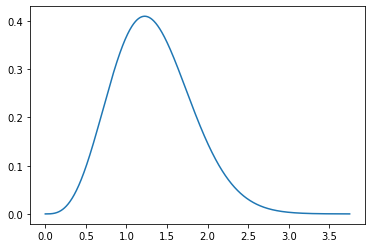

In [30]:
def f(x):
    return np.where(x == 0, 0 , x**3 * np.exp(-x**2))
x= np.linspace(0,3.75,1000)

fig = plt.figure()
plt.plot(x, f(x))

Now using an transformation we define another parameter, $z$:
$$z = \frac{x}{c + x} \rightarrow x = c \frac{z}{1-z}$$

In [53]:
small = 1.e-30
N = int(input('Enter number of intervals: '))

def z_trans(x, c):
    return x/(c + x) 
def x_trans(z, c):
    return c*z/(1.0 - z + small)

def I_t(func, N, c=5):
    z = np.linspace(0.0, 1.0, N+1, endpoint=True)
    I = 0.0
    for n in range(N):
        I = I + (0.5 * (z[n+1] - z[n]) * (func(x_trans(z[n], c)) / (1.0 - z[n] + small)**2 + func(x_trans(z[n+1], c)) / (1.0 - z[n+1] + small)**2))
    I = I * c
    return I

integrand = I_t(f, N, c = 5)
print(f"the integrand is: {integrand}")

0.5000000521080519


In [60]:
k_B = 1.38e-16
m_p = 1.67e-24
T_k = 1.5e7
C_1 = 4 * (np.sqrt((2 * k_B * T_k )/ (np.pi * m_p)))
print(f"estimated solution: {C_1 * integrand}")

exact = 2 * np.sqrt((2 * k_B * T_k) / (np.pi * m_p))
print(f"this is the exact value: {exact}")

estimated solution: 56181979.8389049
this is the exact value: 56181973.983838476
